# Prediction using Decision Tree  Algorithm

## Step 1 : Data Preprocessing Step  

## Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#show value count of species column
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [5]:
# Transforming non-numerical column into numerical column 
df.Species= df.Species.replace({"Iris-setosa" : 0 , 
                                "Iris-versicolor" : 1 ,
                                "Iris-virginica" : 2})

In [6]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


## Extracting Independent and Dependent Variable 

In [7]:
x= df.iloc[ : , 1:5].values
y = df.iloc[ : , 5].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [8]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

"Iris-setosa" : 0 , "Iris-versicolor" : 1 ,"Iris-virginica" : 2

## spliting the dataset into training and test set :

In [9]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split( x , y , test_size = 0.2 , random_state = 0)

## Step 2 : Fitting a Decision Tree algorithm to the Training set

In [10]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = "entropy" , random_state = 0)
dt.fit(x_train , y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

## Step 3 : Predicting the test result 

In [11]:
y_pred = dt.predict(x_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0], dtype=int64)

## Step 4 : Test accuracy of the result 

In [13]:
from sklearn.metrics import confusion_matrix
#Creation of Confusion Matrix :
cm = confusion_matrix(y_test , y_pred)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

In [14]:
#accuracy
cm.diagonal().sum()*100 / cm.sum()

100.0

## Step 5 : Visualization

[Text(418.5, 498.3, 'X[3] <= 0.8\nentropy = 1.581\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(354.11538461538464, 407.70000000000005, 'entropy = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(482.8846153846154, 407.70000000000005, 'X[3] <= 1.75\nentropy = 0.995\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(257.53846153846155, 317.1, 'X[2] <= 4.95\nentropy = 0.469\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(128.76923076923077, 226.5, 'X[3] <= 1.65\nentropy = 0.187\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(64.38461538461539, 135.89999999999998, 'entropy = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(193.15384615384616, 135.89999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(386.3076923076923, 226.5, 'X[3] <= 1.55\nentropy = 0.971\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(321.9230769230769, 135.89999999999998, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(450.69230769230774, 135.89999999999998, 'X[2] <= 5.45\nentropy = 0.918\nsamples = 3\nvalue = [0, 2, 1]')

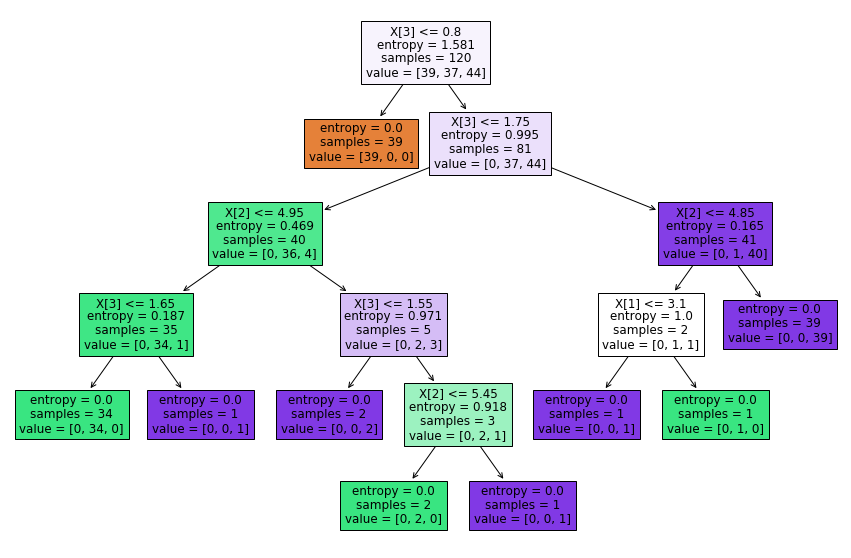

In [15]:
from sklearn import tree
plt.figure(figsize = (15,10))
tree.plot_tree(dt, filled = True)

## END